# Learning Algorithm

## Deep Q-Learning

In value-based reinforcement learning methods, the Q-value specifies the quality of a state-action pair. These values are defined as the expected reward given you started from that state-action pair. Because of this definition, the values follow the Bellman recursion relations.

A DQN (Deep Q-Network) is a method of representing state-action values through a deep neural network. The input to the network is a state-representation, and the output is the value of each action given that state.

To train this network, we allow the agent to interact with the environment, using the DQN and an epsilon-greedy mechanism to select actions. These experiences are stored in a Memory Replay Buffer as (state, action, reward, next_state) tuples.

Periodically, the DQN is trained with experiences sampled from the Memory Replay Buffer. The experiences already have an input state. The target action-values are determined using the reward, the values obtained by running next_state through the DQN, and the Bellman recursion relations. A mean-squared error loss function between the predicted and expected action values is used.

Over time, the agent's DQN learns to output the correct action-values for each state. When the trained DQN is used in conjunction with an epsilon-greedy policy, the agent performs well in the environment.

## DQN Architecture

The architecture for the Q-Network is quite simple, involving 3 layers. The first layer takes in 37 inputs (the dimension of the state space), and the last layer gives 4 outputs (the number of actions).

This architecture is captured in the `model.py` file.

The details can be seen by running the cell below.

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from model import QNetwork


dqn = QNetwork(state_size=37, action_size=4, seed).to(device)

In [ ]:
!pip install torchsummary
from torchsummary import summary

summary(dqn, batch_size=1, device=device)

## Hyperparameters

The training algorithm uses a vanilla implementation of the DQN algorithm.

There are various hyperparameters involved in this implementation:

- `epsilon`: This is the probability with which the agent chooses a random action during training (so that it may explore actions that may be better than what it currently considers optimal). This value is not constant throughout training, and follows an exponentially decreasing schedule which is captured in the `EpsSchedule` class of `utils.py`:
    1. `EPS_START = 1.0`
    2. `EPS_END = 0.01`
    3. `EPS_DECAY = 0.995`
- The rest of the hyperparameters are found in the beginning of the `dqn_agent.py` file:
    1. `BUFFER_SIZE = int(1e5)`: Memory replay buffer size. It stores experience `(state, action, reward, next_state)` tuples extracted from the agents' interactions.
    2. `BATCH_SIZE = 64`: The number of experience tuples used to update the weights of the local DQN.
    3. `GAMMA = 0.99`: Discount factor. How much importance is given to subsequent states when calculating the return from a given state-action pair.
    4. `TAU = 1e-3`: Soft update rate. You don't just assign the weights of the updated local DQN to the target DQN. You take a weighted average of the two and assign that to the target DQN. `TAU` is the weight given to the local DQN in this weighted average.
    5. `LR = 5e-4`: Learning rate. The learning rate used for training the weights of the local DQN.
    6. `UPDATE_EVERY = 4`: You train the weights of the loca DQN with a batch sampled fom the memory replay buffer ever time the agent completed this many timesteps.

# Plot of Rewards

This is taken from the training run which resulted in the weights that solved the environment. By the end, the agent was getting an average score of more than 13 over 100 episodes: 

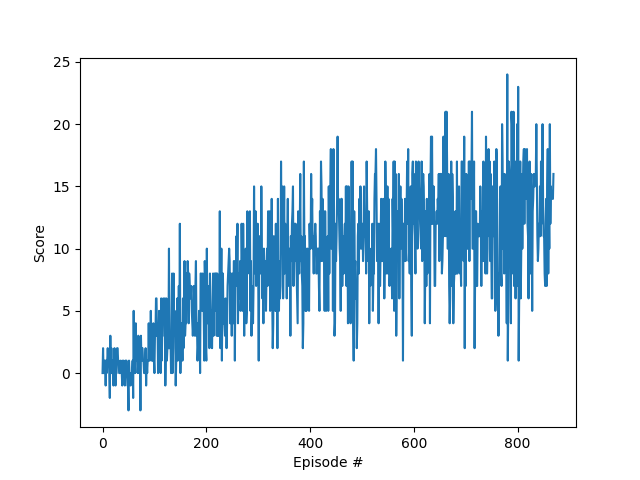

The training completed in 770 episodes:

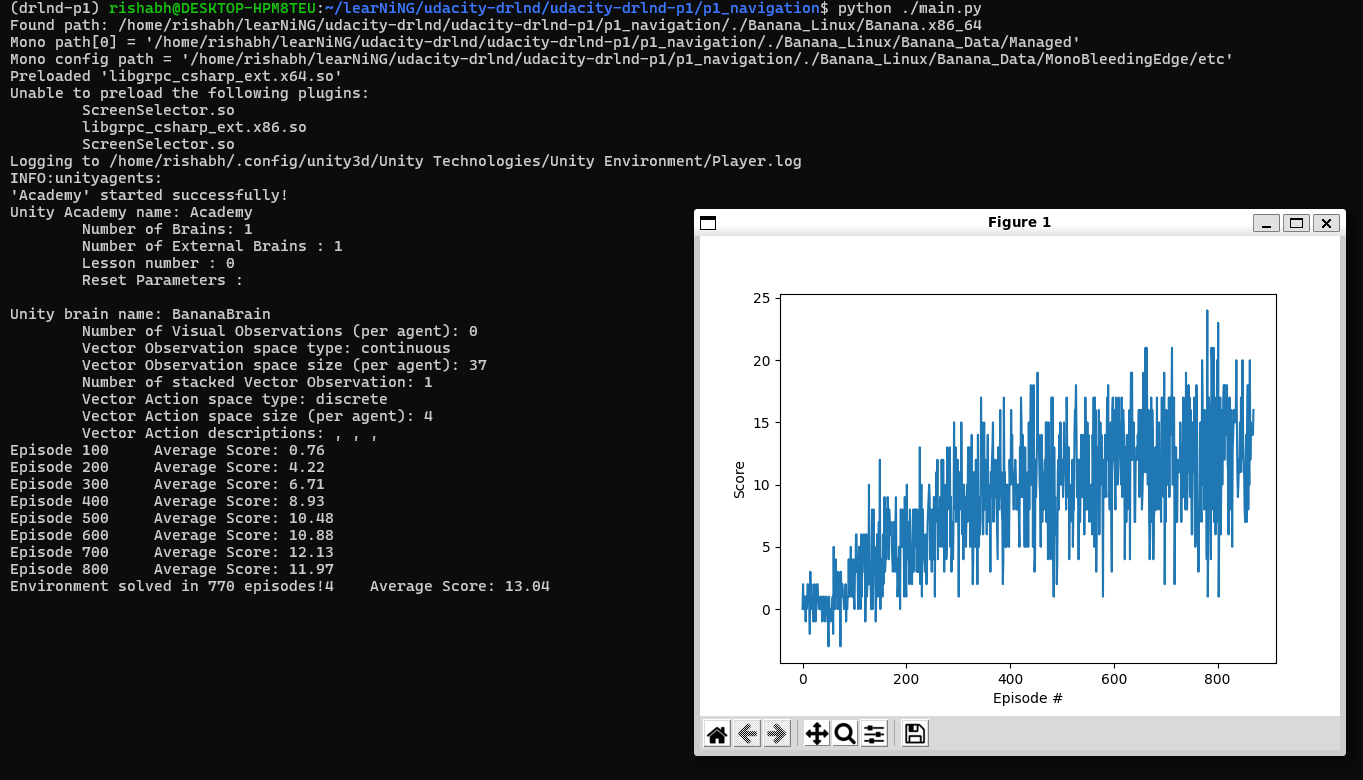

# Ideas for Future Improvement

Some classc modifications to try include:

- [Prioritized Experience Replay](https://arxiv.org/abs/1707.06887) - Prioritized Experiecne Replay, as explained in the lecture videos.
- [Distirbutional RL](https://arxiv.org/abs/1707.06887) - This is a largey theoretical exploration which uses stochastic versions of the Bellman recursion relations in order to learn the distribution of the return an agent will receive from a state-action pair, as opposed to the expected return (i.e., the Q-value).
- [Noisy Networks](https://arxiv.org/abs/1706.10295) - Implemeting exploration by introducing learned noise into the weights of the DQN itself (as opposed to by using an epsilon-greedy policy). The benefits of this could be huge, according to the authors of the paper.

# Visualizing the Trained Agent